# Importing required Modules

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import seaborn as sns

# Reading the dataset

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
X = df.loc[:,['Age','EstimatedSalary']].values
y = df.loc[:,'Purchased'].values

# Train-test Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

for i in range(X_train.shape[1]):
    
    print("Training data: {}th column, mean: {:.2f}, std: {:.2f}".format(i,X_train[:,i].mean(),X_train[:,i].std()))
    print("Test data:     {}th column, mean: {:.2f}, std: {:.2f}".format(i,X_test[:,i].mean(),X_test[:,i].std()))

Training data: 0th column, mean: 38.13, std: 10.10
Test data:     0th column, mean: 36.24, std: 11.40
Training data: 1th column, mean: 69583.33, std: 34490.91
Test data:     1th column, mean: 70220.00, std: 32704.92


# Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

for i in range(X_train.shape[1]):
    
    print("Training data: {}th column, mean: {:.2f}, std: {:.2f}".format(i,X_train_sc[:,i].mean(),X_train_sc[:,i].std()))
    print("Test data:     {}th column, mean: {:.2f}, std: {:.2f}".format(i,X_test_sc[:,i].mean(),X_test_sc[:,i].std()))

Training data: 0th column, mean: 0.00, std: 1.00
Test data:     0th column, mean: -0.19, std: 1.13
Training data: 1th column, mean: 0.00, std: 1.00
Test data:     1th column, mean: 0.02, std: 0.95


# Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train_sc,y_train)
y_pred_lr = classifier_lr.predict(X_test_sc)

# Evaluating the model

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("The confusion matrix: \n{}".format(confusion_matrix(y_test, y_pred_lr)))
print("The accuracy of the model is {:.2%}".format(accuracy_score(y_test, y_pred_lr)))

The confusion matrix: 
[[65  3]
 [ 8 24]]
The accuracy of the model is 89.00%


# Visualizing the test set results

In [8]:
from matplotlib.colors import ListedColormap

def plot_reg(X,y,classifier,step):
    
    # Creating a Meshgrid from unscaled X and y
    X_set, y_set = sc.inverse_transform(X), y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = step),
                         np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = step))
    
    # Plotting the regression predictions for each combination of Meshgrid
    plt.figure(figsize = [15,7])
    plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha = 0.5, cmap = ListedColormap(('red', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    # Scattering the test data
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'blue'))(i), marker = "x", label = j)
        
    plt.title('Logistic Regression (Test set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

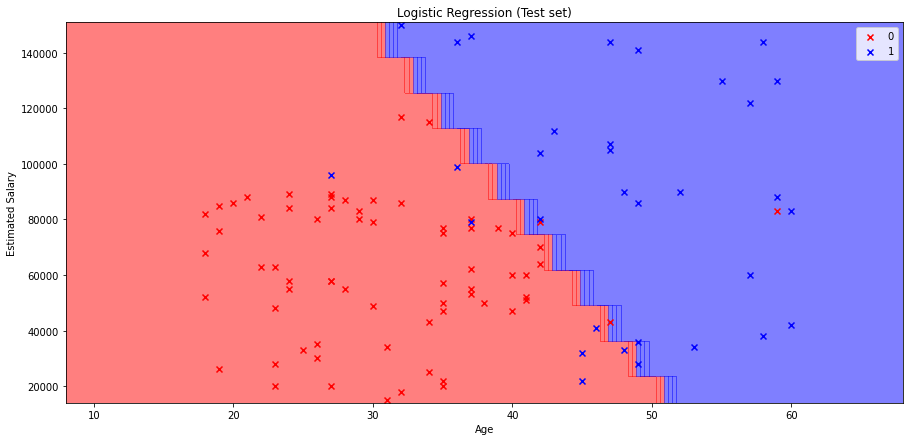

In [9]:
plot_reg(X_test_sc, y_test, classifier_lr, 2)

# KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5)
classifier_knn.fit(X_train_sc,y_train)
y_pred_knn = classifier_knn.predict(X_test_sc)
print("The accuracy of this KNN classifier is {0:.0%}".format(accuracy_score(y_test, y_pred_knn)))

The accuracy of this KNN classifier is 93%


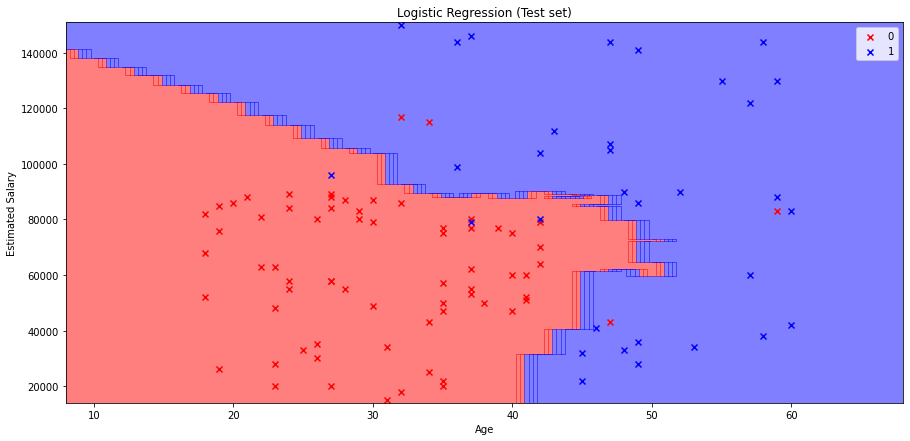

In [11]:
plot_reg(X_test_sc, y_test, classifier_knn, 2)

# SVC

In [12]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear', random_state = 0)
classifier_svc.fit(X_train_sc, y_train)
y_pred_svc = classifier_svc.predict(X_test_sc)
print("The accuracy of this svc model was {:.0%}".format(accuracy_score(y_test, y_pred_svc)))

The accuracy of this svc model was 90%


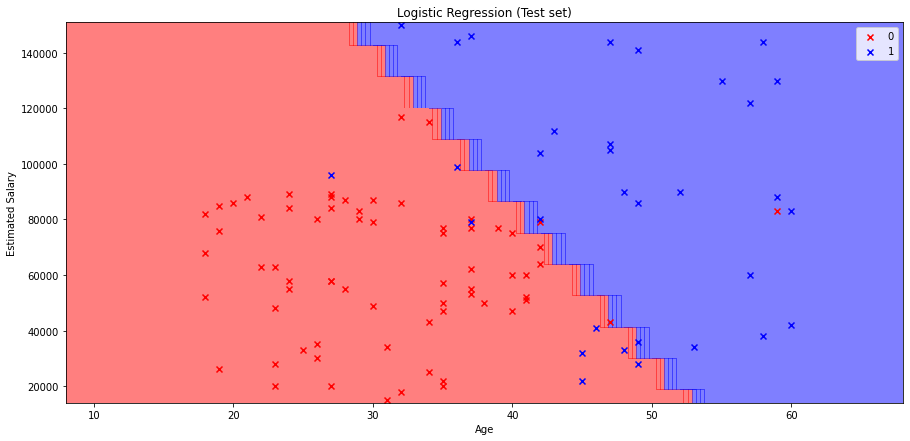

In [13]:
plot_reg(X_test_sc, y_test, classifier_svc, 2)

# Kernel SVM

In [14]:
from sklearn.svm import SVC
classifier_svc_rbf = SVC(kernel = 'rbf', random_state = 0)
classifier_svc_rbf.fit(X_train_sc,y_train)
y_pred_svc_rbf = classifier_svc_rbf.predict(X_test_sc)
print("The accuracy of this svm model was {0:.0%}".format(accuracy_score(y_test, y_pred_svc_rbf)))

The accuracy of this svm model was 93%


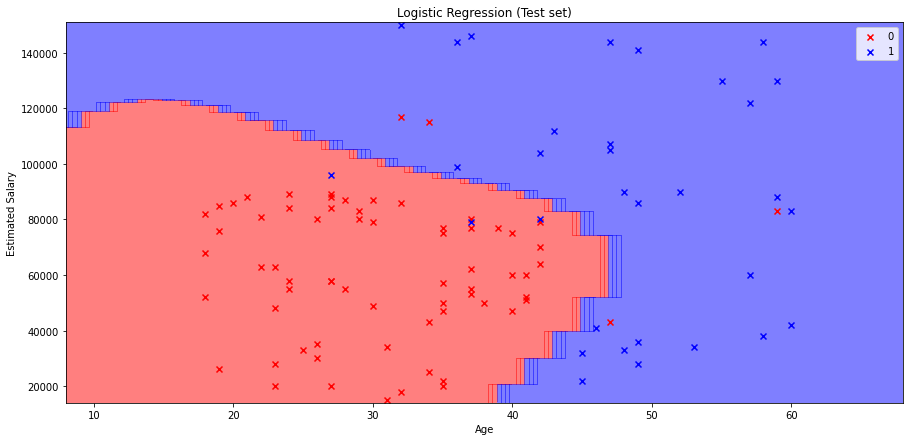

In [15]:
plot_reg(X_test_sc, y_test, classifier_svc_rbf, 2)

# Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train_sc, y_train)
y_pred_nb = classifier_nb.predict(X_test_sc)
print("The accuracy of this model was {0:.0%}".format(accuracy_score(y_test, y_pred_nb)))

The accuracy of this model was 90%


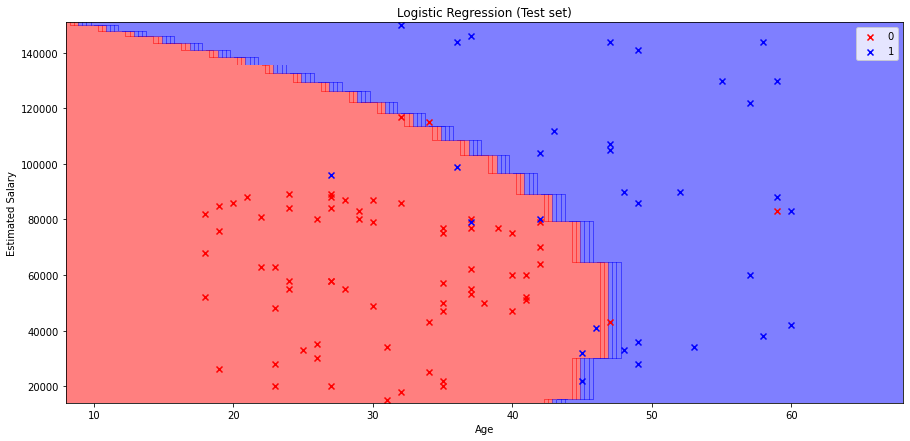

In [17]:
plot_reg(X_test_sc, y_test, classifier_nb, 2)

# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(max_depth = 5,criterion = 'entropy')
classifier_dt.fit(X_train_sc, y_train)
y_pred_dt = classifier_dt.predict(X_test_sc)
print("The accuracy of this model was {0:.0%}".format(accuracy_score(y_test, y_pred_dt)))

The accuracy of this model was 94%


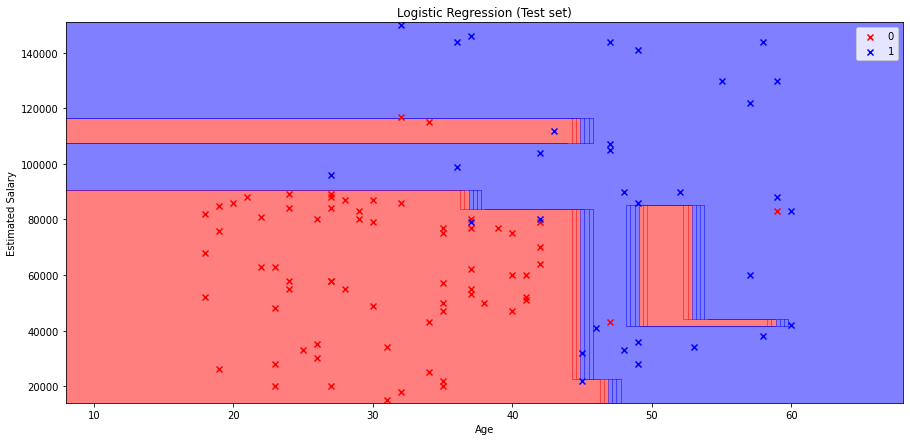

In [19]:
plot_reg(X_test_sc, y_test, classifier_dt, 2)

# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4, random_state = 0)
classifier_rf.fit(X_train_sc, y_train)
y_pred_rf = classifier_rf.predict(X_test_sc)
print("The acuracy of this classifier was {0:.0%}".format(accuracy_score(y_test, y_pred_rf)))

The acuracy of this classifier was 94%


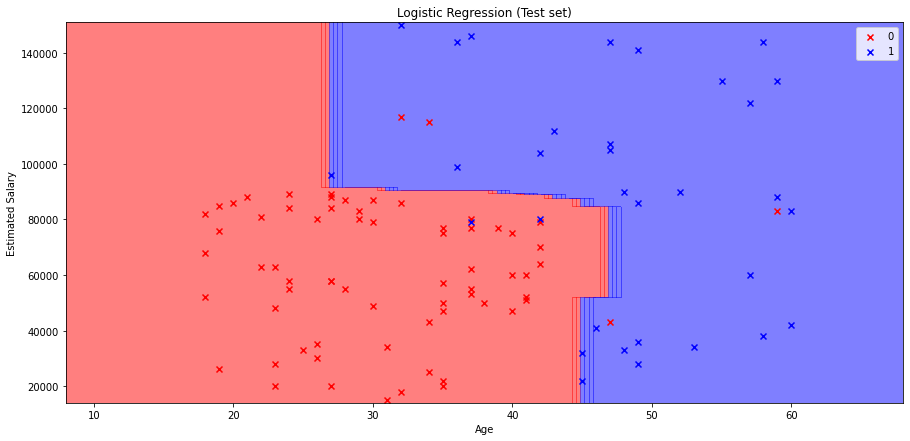

In [21]:
plot_reg(X_test_sc, y_test, classifier_rf, 2)

# Comparing the performance of the above Classifiers

## Confusion Matrix

In [82]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svc = confusion_matrix(y_test, y_pred_svc)
cm_svc_rbf = confusion_matrix(y_test, y_pred_svc_rbf)

cm_list = [cm_lr, cm_knn,cm_nb,cm_dt,cm_rf,cm_svc,cm_svc_rbf]

classifier_names = ["Logistic Regression", "KNN", "Naive Bayes", "Decision Tree", "Random Forest", "Linear SVC", "RBF SVC"]

ax(7) contains no plots
ax(8) contains no plots


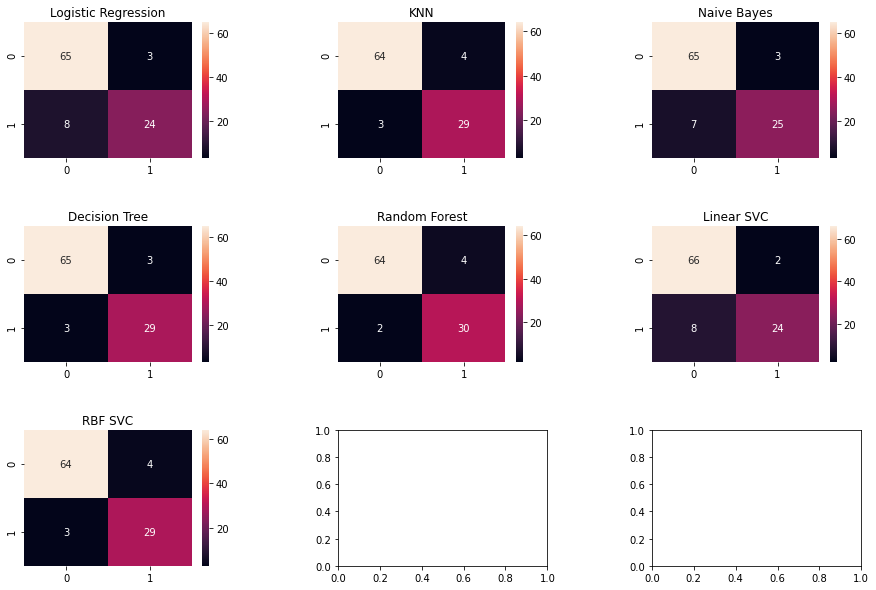

In [84]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = [15,10])
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i, ax in enumerate(axes.ravel()):
    try:
        sns.heatmap(cm_list[i] , ax = ax, annot=True)
        ax.set_title(classifier_names[i])
    except:
        print("ax({}) contains no plots".format(i))

## Accuracy Score

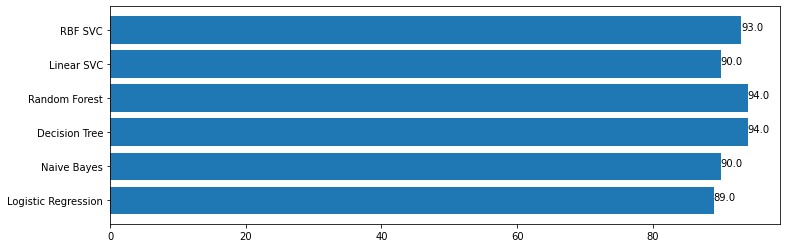

In [70]:
from sklearn.metrics import accuracy_score

acc_lr = accuracy_score(y_test, y_pred_lr)
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_svc = accuracy_score(y_test, y_pred_svc)
acc_svc_rbf = accuracy_score(y_test, y_pred_svc_rbf)

acc_list = [acc_lr,acc_nb,acc_dt,acc_rf,acc_svc,acc_svc_rbf]
classifier_names = ["Logistic Regression", "Naive Bayes", "Decision Tree", "Random Forest", "Linear SVC", "RBF SVC"]

plt.figure(figsize = [12,4])
plt.barh(np.arange(len(acc_list)), np.array(acc_list)*100)
plt.yticks(np.arange(len(acc_list)), classifier_names)
for i in range(len(acc_list)):
    plt.annotate(acc_list[i]*100, (acc_list[i]*100,i))

## Precision Score : <font color = 'red'>TruePositives / (TruePositives + FalsePositives)

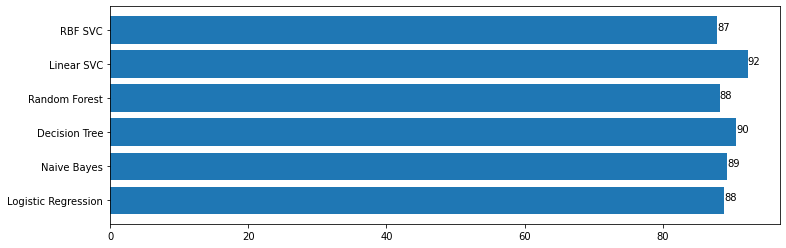

In [72]:
from sklearn.metrics import precision_score

pre_lr = precision_score(y_test, y_pred_lr)
pre_nb = precision_score(y_test, y_pred_nb)
pre_dt = precision_score(y_test, y_pred_dt)
pre_rf = precision_score(y_test, y_pred_rf)
pre_svc = precision_score(y_test, y_pred_svc)
pre_svc_rbf = precision_score(y_test, y_pred_svc_rbf)

pre_list = [pre_lr,pre_nb,pre_dt,pre_rf,pre_svc,pre_svc_rbf]
classifier_names = ["Logistic Regression", "Naive Bayes", "Decision Tree", "Random Forest", "Linear SVC", "RBF SVC"]

plt.figure(figsize = [12,4])
plt.barh(np.arange(len(pre_list)), np.array(pre_list)*100)
plt.yticks(np.arange(len(pre_list)), classifier_names)
for i in range(len(pre_list)):
    plt.annotate(int(pre_list[i]*100), (pre_list[i]*100,i))

## Recall Score : <font color = 'red'>TruePositives / (TruePositives + FalseNegatives)

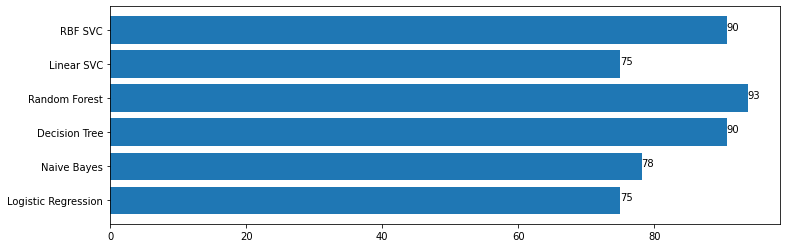

In [73]:
from sklearn.metrics import recall_score

rec_lr = recall_score(y_test, y_pred_lr)
rec_nb = recall_score(y_test, y_pred_nb)
rec_dt = recall_score(y_test, y_pred_dt)
rec_rf = recall_score(y_test, y_pred_rf)
rec_svc = recall_score(y_test, y_pred_svc)
rec_svc_rbf = recall_score(y_test, y_pred_svc_rbf)

rec_list = [rec_lr,rec_nb,rec_dt,rec_rf,rec_svc,rec_svc_rbf]
classifier_names = ["Logistic Regression", "Naive Bayes", "Decision Tree", "Random Forest", "Linear SVC", "RBF SVC"]

plt.figure(figsize = [12,4])
plt.barh(np.arange(len(rec_list)), np.array(rec_list)*100)
plt.yticks(np.arange(len(rec_list)), classifier_names)
for i in range(len(rec_list)):
    plt.annotate(int(rec_list[i]*100), (rec_list[i]*100,i))

## F1 Score : <font color = 'red'>(2 * Precision * Recall) / (Precision + Recall)

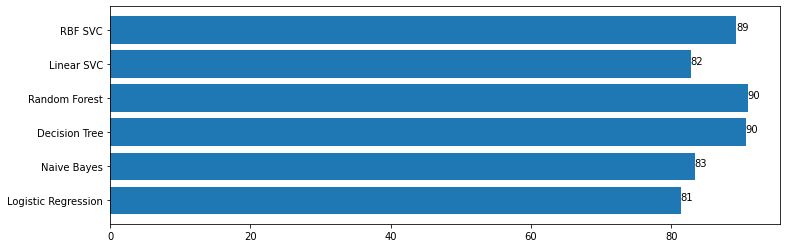

In [75]:
from sklearn.metrics import f1_score

f1_lr = f1_score(y_test, y_pred_lr)
f1_nb = f1_score(y_test, y_pred_nb)
f1_dt = f1_score(y_test, y_pred_dt)
f1_rf = f1_score(y_test, y_pred_rf)
f1_svc = f1_score(y_test, y_pred_svc)
f1_svc_rbf = f1_score(y_test, y_pred_svc_rbf)

f1_list = [f1_lr,f1_nb,f1_dt,f1_rf,f1_svc,f1_svc_rbf]
classifier_names = ["Logistic Regression", "Naive Bayes", "Decision Tree", "Random Forest", "Linear SVC", "RBF SVC"]

plt.figure(figsize = [12,4])
plt.barh(np.arange(len(f1_list)), np.array(f1_list)*100)
plt.yticks(np.arange(len(f1_list)), classifier_names)
for i in range(len(f1_list)):
    plt.annotate(int(f1_list[i]*100), (f1_list[i]*100,i))